### Reading Data

In [1]:
#importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing requireds libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading csv file usinnf pandas
bikedata = pd.read_csv("day.csv")

In [4]:
#Checking first 5 dataset
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding data

In [5]:
###checking shape of dataset
bikedata.shape

(730, 16)

In [6]:
#here we can see that our data contain 730 rows(entries) and 16 columns, After it we check for null values 

In [7]:
###checking null values and datatype
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Here we find there is no missing value or null value

### Cleaning Data

In [10]:
###Dropping columns that are not useful for futhure process
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# 1) instant - here we assume properly we see it is only an index value so,it is not useful
# 2) dteday - instead of dteday we have in our data separte column for mnth yr so,i think it is also useless
# 3) cnt is total of casual and registered or let say cnt = causual+registered so,here we can say that our target variable is cnt

In [12]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
new_bikedata = bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [14]:
#now we have new data or clean data for futhure anaylsis
###Checking datatype for conversion
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
### here we convert variables mnth,weekday,season and weathersit into int to category type
new_bikedata['mnth'] = new_bikedata['mnth'].astype('category')
new_bikedata['season'] = new_bikedata['season'].astype('category')
new_bikedata['weekday'] = new_bikedata['weekday'].astype('category')
new_bikedata['weathersit'] = new_bikedata['weathersit'].astype('category')

In [16]:
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [17]:
new_bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


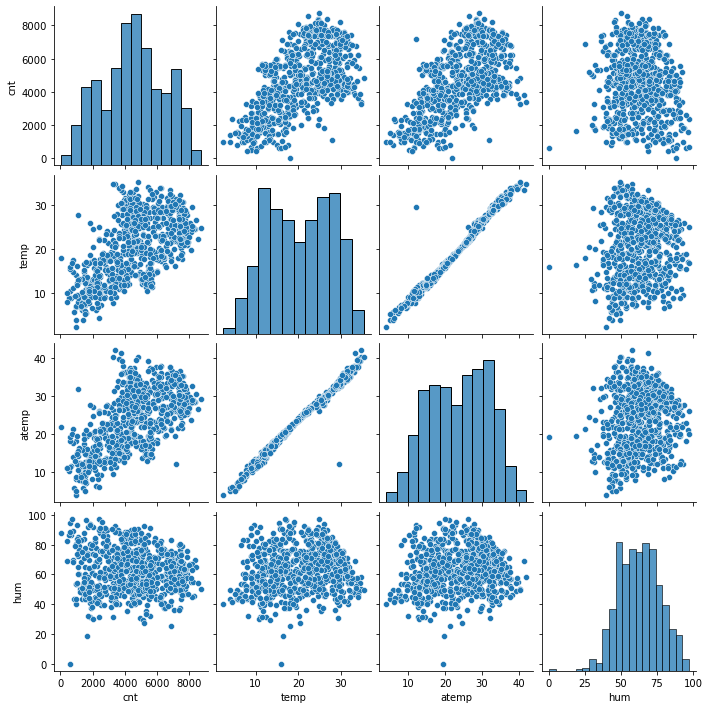

In [18]:
###now we check linear relationship for continuos numeric data
sns.pairplot(data=new_bikedata,vars=['cnt','temp','atemp','hum'])
plt.show()

In [19]:
#On above pairplot we can clearly see temp and atemp has highest correlation with target variable cnt
#It means output variable has a linear relationship with variables like temp and atemp.

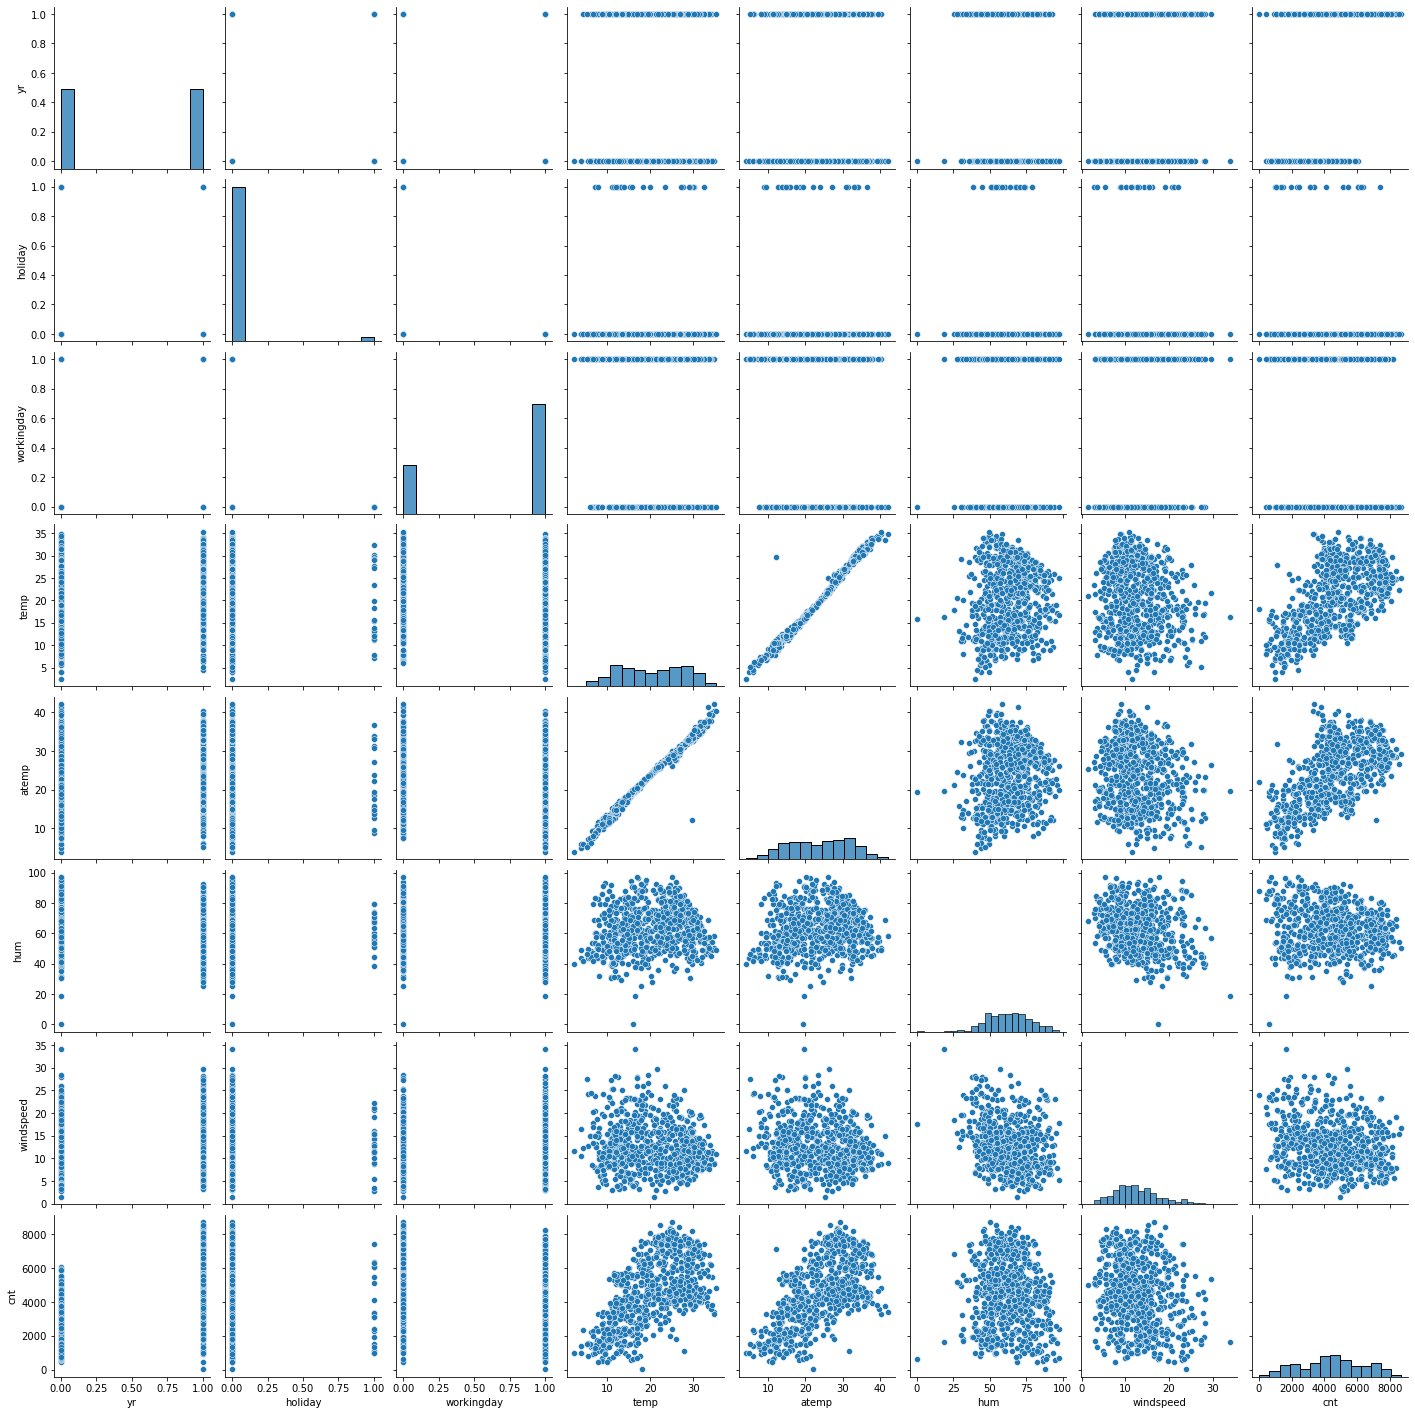

In [20]:
#lets check correlation between the numeric variables
sns.pairplot(new_bikedata)
plt.show()

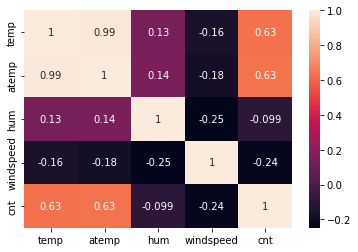

In [21]:
#Now we check continuous variables relationship
sns.heatmap(new_bikedata[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.show()

In [22]:
#So here temp and atemp are correlation more than 0.99 it means almost 1 which is highly correlated 

In [23]:
#futhure anaylsis we perform after creating dummies variables

In [113]:
### Creating Dummy variables

In [114]:
?pd.get_dummies

In [115]:
new_bikedata = pd.get_dummies(new_bikedata,drop_first=True)

In [116]:
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [117]:
new_bikedata.shape

(730, 30)

### Spliting the data 

WE will split data in 70:30 ratio for train and test purpose

using train_test_split method from sklearn package 

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
np.random.seed(0)
df_train, df_test = train_test_split(new_bikedata, train_size=0.70, test_size=0.30, random_state=333)

In [120]:
#Note: using random_state we get same train and test sets across different execution

In [121]:
#Now we verify info and shape of dataframe
df_train.shape

(510, 30)

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [123]:
df_test.shape

(219, 30)

In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [125]:
### Now next we need to perform EDA on df_train dataset

### EDA

In [126]:
#Numeric variable 
#let's make pairplot to all numeric variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [127]:
#let's check columns 
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

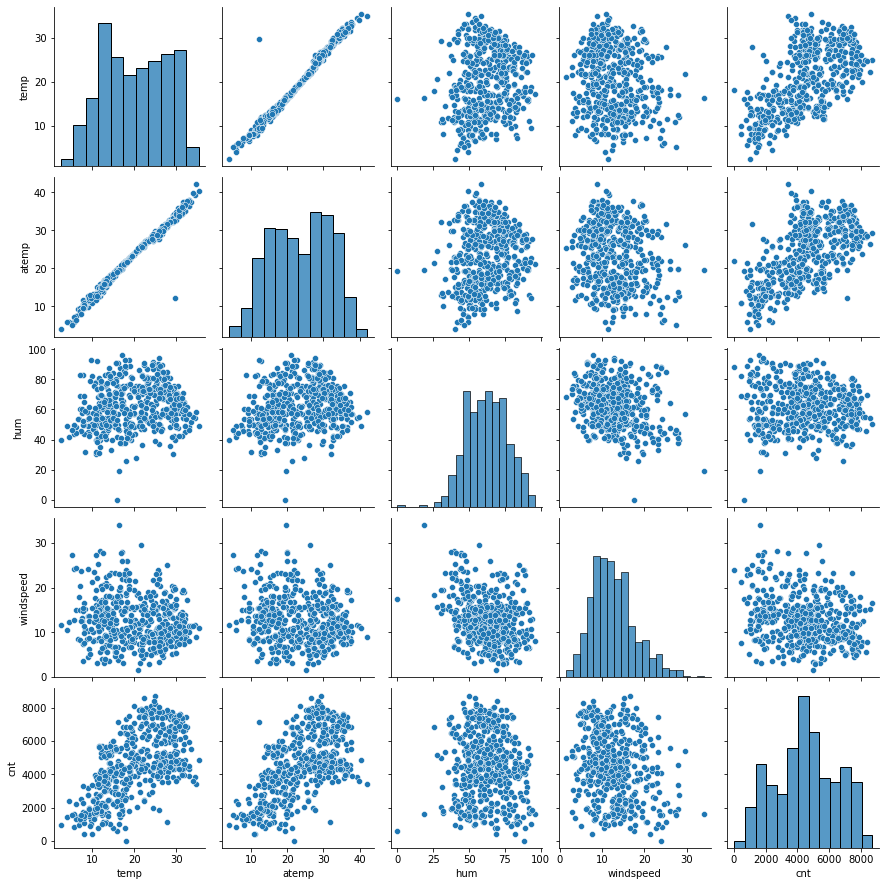

In [128]:
#create a new df for numeric variables

bike_num = df_train[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

In [129]:
#here once again after spliting data we got same result which is Linear relationship between temp,atemp and cnt 

In [130]:
#let's check categorical variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [131]:
#so let's build boxplot to all categorical varibale
#categorical varibale : season,mnth,weathersit,holiday,weekday,workingday

In [132]:
?plt.subplot

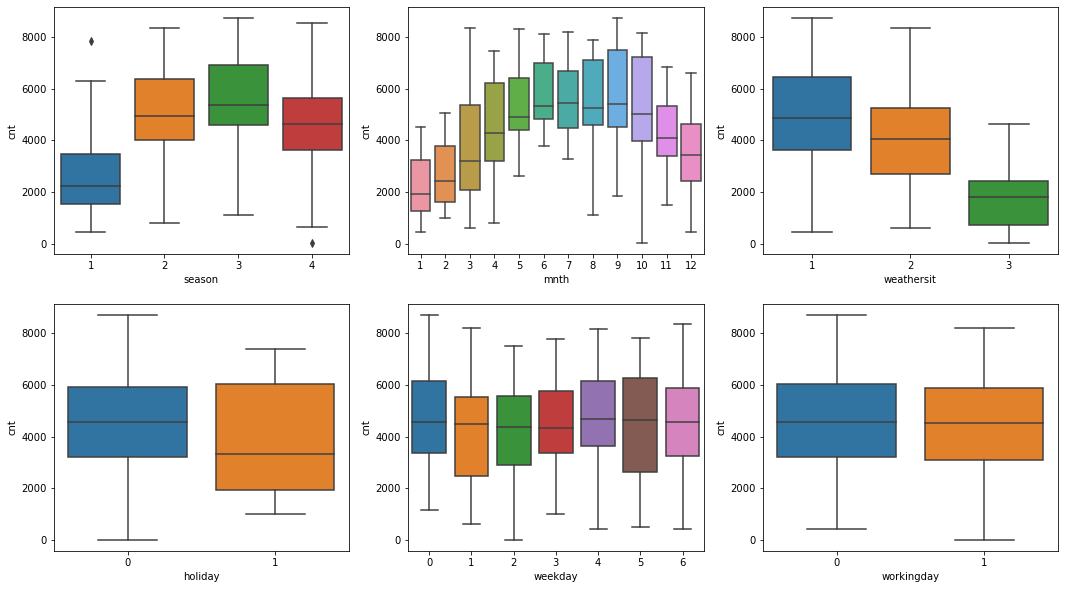

In [133]:
#here we use subplot method to analysis our categorical variables 
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.boxplot(data=bikedata, x='season',y='cnt')
plt.subplot(2,3,2)
sns.boxplot(data=bikedata, x='mnth',y='cnt')
plt.subplot(2,3,3)
sns.boxplot(data=bikedata, x='weathersit',y='cnt')
plt.subplot(2,3,4)
sns.boxplot(data=bikedata, x='holiday',y='cnt')
plt.subplot(2,3,5)
sns.boxplot(data=bikedata, x='weekday',y='cnt')
plt.subplot(2,3,6)
sns.boxplot(data=bikedata, x='workingday',y='cnt')
plt.show()

In [134]:
#Let's discuss one by one which categorical variable is a good predictor for the dependent variables

In [135]:
#Season - In season 3 we can see that more booking happenings eith median of over 5000 booking.
# And we also see that in season 2 and 4 some approximate booking are fixed
# So, Season can be good predictor for the dependent variable

#mnth - Almost 10% of bike booking were happening in the months 5,6,7,8 and 9 with median of over 4000 booking per month
# It is also idicate that mnth can be good predictor fot he dependent variable

#weathersit - During weathersit1 almost 60 to 70% of bike booking happening with median close to 5000 booking
# It can be a good predictor for the dependent variable

#holiday - Almost 97% of the bike booking were happening when it is not a holiday which means this data does not accurately reprent a model's use
# holiday cannot be a good predictor for the dependent variable

#weekdays - weekdays variable shows very close to each other or having close trend having their independent medians between 4000 to 5000\

#workingdays - almost 70% of the bike booking happening in 'workingday' with median of close to 5000 booking
# it can be a good predictor for the dependent variable

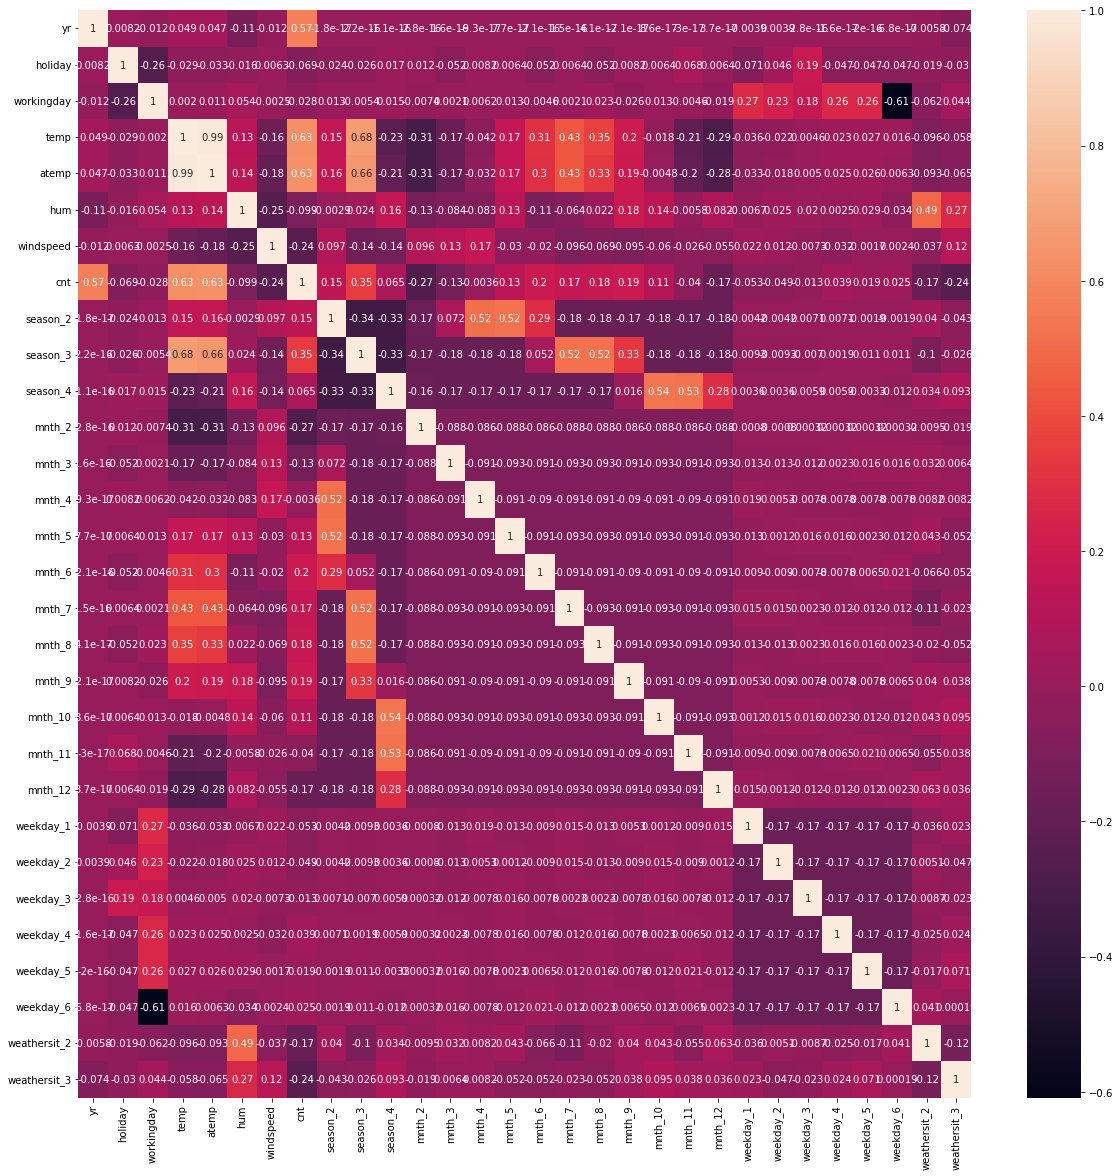

In [136]:
#Now checking correlation between variables 
plt.figure(figsize=(20,20))
sns.heatmap(new_bikedata.corr(),annot=True)
plt.show()

In [137]:
#Rescaling the features

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [139]:
# checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


In [140]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [141]:
# Now Apply scaler() to all the numerical variables

num_v = ['temp','atemp','hum','windspeed','cnt']
df_train[num_v] = scaler.fit_transform(df_train[num_v])

In [142]:
#checking value after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [143]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building Linear Model

In [144]:
#dividing data into x and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [145]:
#importing RFE(Recursive feature eleimation) and LineaRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [146]:
#now running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,15)

rfe = rfe.fit(X_train,y_train)

In [147]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [148]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [149]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [150]:
#now creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'Stats MODEL'

### MODEL 1

In [151]:
#checking VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


In [152]:
#Adding constant 
import statsmodels.api as sm

X_train_lr1 = sm.add_constant(X_train_rfe)

In [153]:
#creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lr1).fit()

In [154]:
#Checking the parameter 
lr1.params

const           0.238008
yr              0.228826
temp            0.394274
atemp           0.088717
hum            -0.170955
windspeed      -0.179931
season_2        0.132386
season_3        0.085290
season_4        0.152474
mnth_3          0.047074
mnth_9          0.100467
mnth_10         0.055654
weekday_1      -0.024262
weekday_2      -0.036756
weathersit_2   -0.047653
weathersit_3   -0.272332
dtype: float64

In [155]:
#Printing a summuray
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.36e-185
Time:                        15:42:20   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437   

In [156]:
#Here we obsereve p-value of atemp which is high it means it is insignificant and also high VIF
#So we remove atemp and build our next model

In [157]:
#Removing 'atemp'
X_train_new = X_train_rfe.drop(['atemp'], axis=1)

### Model 2

In [158]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [159]:
#Adding constant
X_train_lr2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lr2).fit()

In [160]:
#cheking parameters
lr2.params

const           0.239301
yr              0.228801
temp            0.478180
hum            -0.170199
windspeed      -0.183401
season_2        0.132551
season_3        0.083833
season_4        0.152847
mnth_3          0.047300
mnth_9          0.100500
mnth_10         0.055765
weekday_1      -0.023908
weekday_2      -0.036461
weathersit_2   -0.047855
weathersit_3   -0.272823
dtype: float64

In [161]:
#print summuary
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        15:42:22   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509   

In [162]:
#here we see that we have also 2 features with high VIF 'temp' and 'hum' 
#but we eliminate only 'hum' because 'temp'- temperature is good factor for a bussiness like bike rental

In [163]:
#droping 'hum'
X_train_new = X_train_new.drop(['hum'], axis=1)

### Model 3

In [164]:
#cheking VIF

vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,yr,2.01
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [165]:
#Adding constant
X_train_lr3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lr3).fit()

In [166]:
#cheking params
lr3.params

const           0.141684
yr              0.232973
temp            0.446142
windspeed      -0.146573
season_2        0.134285
season_3        0.093151
season_4        0.149627
mnth_3          0.054857
mnth_9          0.092169
mnth_10         0.054644
weekday_1      -0.027920
weekday_2      -0.039708
weathersit_2   -0.076113
weathersit_3   -0.323355
dtype: float64

In [167]:
#printting summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.86e-183
Time:                        15:42:25   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.018      7.702   

In [168]:
#We remove 'season_3' variable based on it's high VIF value.

In [169]:
X_train_new = X_train_new.drop(['season_3'], axis=1)

### Model4

In [170]:
#cheking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [171]:
#Adding contant
X_train_lr4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lr4).fit()

In [172]:
#cheking parameters
lr4.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

In [173]:
#print summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.66e-180
Time:                        15:42:27   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828   

In [177]:
#Removing mnth_10 based on high p-value
X_train_new = X_train_new.drop(['mnth_10'], axis=1)

### Model5

In [175]:
#cheking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,3.95
2,windspeed,3.68
0,yr,1.99
3,season_2,1.56
9,weathersit_2,1.50
4,season_4,1.38
8,weekday_2,1.21
6,mnth_9,1.20
7,weekday_1,1.18
5,mnth_3,1.14


In [178]:
#Adding constant
X_train_lr5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lr5).fit()

In [179]:
#parameters
lr5.params

const           0.122966
yr              0.229933
temp            0.571723
windspeed      -0.154162
season_2        0.082012
season_4        0.132559
mnth_3          0.043741
mnth_9          0.097884
weekday_1      -0.025892
weekday_2      -0.037583
weathersit_2   -0.074658
weathersit_3   -0.309677
dtype: float64

In [180]:
#Summuary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.60e-180
Time:                        15:46:14   Log-Likelihood:                 483.73
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     498   BIC:                            -892.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1230      0.018      6.684   

In [181]:
#based on p-value we also remove 'weekday_1'
X_train_new = X_train_new.drop(['weekday_1'], axis=1)

### Model 6

In [183]:
#cheking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,3.92
2,windspeed,3.60
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.38
6,mnth_9,1.20
7,weekday_2,1.18
5,mnth_3,1.14
9,weathersit_3,1.07


In [184]:
#Adding constant
X_train_lr6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train, X_train_lr6).fit()

In [187]:
#parameters
lr6.params

const           0.116331
yr              0.230358
temp            0.574865
windspeed      -0.154510
season_2        0.082136
season_4        0.133214
mnth_3          0.045575
mnth_9          0.097524
weekday_2      -0.033254
weathersit_2   -0.074176
weathersit_3   -0.309405
dtype: float64

In [186]:
#summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.8
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          9.43e-181
Time:                        15:52:03   Log-Likelihood:                 481.45
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     499   BIC:                            -894.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1163      0.018      6.395   

In [188]:
#Now this model looks good
#we seems here very low multicollinearity between the predictors and the p-value for all the predictors seems to be siginificant.
#We choose it as a final model

### Final Model Interpretation

Hypothesis Testing

1. H0:B1=B2=..=Bn=0
2. H1:at least one Bi!=0

### lr6 model cofficient values


1.const           0.116331
2.yr              0.230358
3.temp            0.574865
4.windspeed      -0.154510
5.season_2        0.082136
6.season_4        0.133214
7.mnth_3          0.045575
8.mnth_9          0.097524
9.weekday_2      -0.033254
10.weathersit_2   -0.074176
11.weathersit_3   -0.309405

In [189]:
#from model 6 summary,we can conclude that all our coefficient are not equal to zero, ahich means we Reject the null hypothesis


### F Statistic

In [190]:
#F-static is used for testing the overall significance of the model
#higher the F-Statistic, more significant the model is.


In [ ]:
#F-statistic: 232.8
#Prob (F-statistic): 9.43e-181

In [191]:
#The F-statistic value of 232.8(which is greater than 1) and the p-value of '~0.0000' states that overall model are significant

### Assumptions

Residual Analysis of training data

In [192]:
y_train_pred = lr6.predict(X_train_lr6)

Text(0.5, 0, 'Errors')

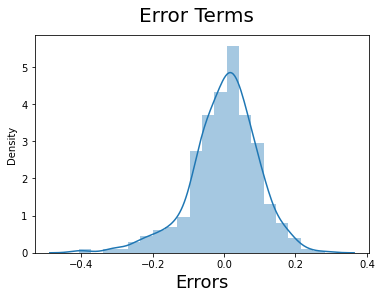

In [194]:
res = y_train-y_train_pred
#ploting histogram of the errors terms
fig = plt.figure()
sns.distplot((res), bins =20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [195]:
#Residuals are normally distributed
#our assumption for linearRegression is valid

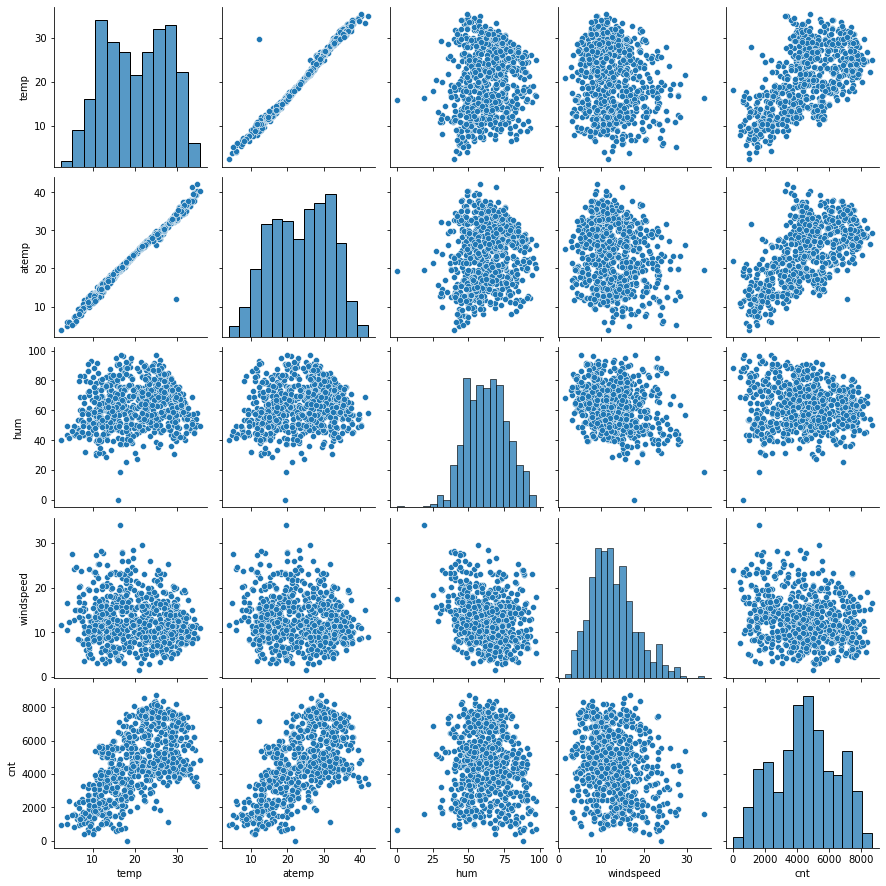

In [197]:
#linear relationship between x and y
new_bikedata = new_bikedata[['temp','atemp','hum','windspeed','cnt']]

sns.pairplot(new_bikedata)
plt.show()

In [198]:
#here we see that again linear relation between temp and atemp variable with predictor 'cnt'

In [199]:
#And also we found that there is no multicollinearity between predictor variables

### Making prediction usnig final model

In [200]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [201]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [202]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
#Divivding into x_text and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [204]:
#selecting varibales
col1 = X_train_new.columns
X_test = X_test[col1]

In [206]:
#adding constant
X_test_lr6 = sm.add_constant(X_test)
X_test_lr6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_3        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_2     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [207]:
#making predictions
y_pred = lr6.predict(X_test_lr6)

In [208]:
print(y_pred)

22     0.038444
468    0.687362
553    0.860614
504    0.757286
353    0.396909
         ...   
237    0.555780
611    0.853635
258    0.388227
518    0.766540
313    0.352120
Length: 219, dtype: float64


### model evaluation

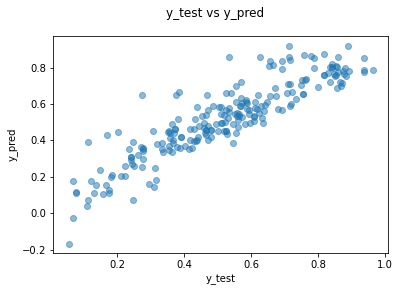

In [209]:
#plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test,y_pred, alpha=0.5)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### R2 value for test

In [210]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8021403119729937

### Final report

In [ ]:
#As per our final model, the top 3 predictor variables are
#1) Temperature(temp) - coefficient value is '0.5748', which means temp variables increases the bike hire numbers by 0.5748 units
#2) weather situation3(weathersit_3) - coefficient value is '-0.3094', which means weathersit_3 variables decreases the bike hire numbers by 0.3094 units
#3) year (yr) - coefficient value is '0.2303', which means yr variables increases the bike hire numbers by 0.2303 units